# Train Baseline Model

---

### Setup

In [132]:
import joblib
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, classification_report

---

### Load Data

In [3]:
xy_train = joblib.load('./data/xy/xy_train.joblib')
models = {}

In [4]:
xy_test = joblib.load('./data/xy/xy_test.joblib')

In [5]:
xy_train.keys()

dict_keys(['2009_2014', '2009_2015', '2009_2016', '2009_2017', '2009_2018', '2009_2019', '2009_2020', '2009_2021', '2009_2022', '2009_2023'])

In [6]:
xy_test.keys()

dict_keys(['2009_2014', '2009_2015', '2009_2016', '2009_2017', '2009_2018', '2009_2019', '2009_2020', '2009_2021', '2009_2022', '2009_2023'])

In [7]:
# Get train data
data = xy_train['2009_2014']
# Separate features and target
x = data.drop(columns=['y'])
y = data['y']

In [8]:
x.shape, y.shape

((200424, 191), (200424,))

In [9]:
# Get test data
data_test = xy_test["2009_2014"]
# Separate features and target
x_test = data_test.drop(columns=['y'])
y_test = data_test['y']

In [10]:
x_test.shape, y_test.shape

((39176, 191), (39176,))

---

### Train and Evaluate Model

##### Logistic regression

In [93]:
clf = LogisticRegression()

In [94]:
clf.fit(x, y)

LogisticRegression()

In [95]:
y_pred = clf.predict_proba(x_test)[:,1]

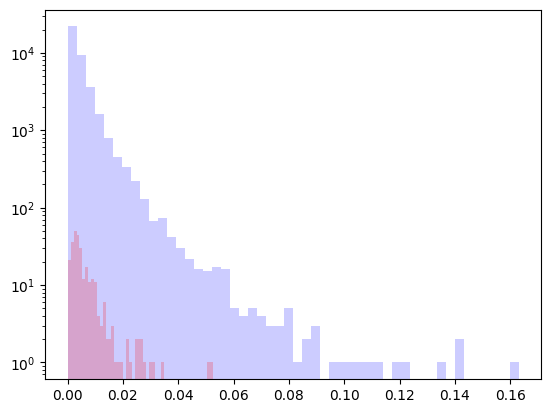

In [96]:
_=plt.hist(y_pred[y_test==0], color="b", alpha=0.2, bins=50, log=True)
_=plt.hist(y_pred[y_test==1], color="r", alpha=0.2, bins=50, log=True)

In [97]:
threshold = 0.5

In [98]:
print(classification_report(y_test, np.where(y_pred>=threshold, 1, 0)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     38894
           1       0.00      0.00      0.00       282

    accuracy                           0.99     39176
   macro avg       0.50      0.50      0.50     39176
weighted avg       0.99      0.99      0.99     39176



/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined

In [100]:
print(f"PR-AUC: {average_precision_score(y_test, y_pred)}")

PR-AUC: 0.01062777056325041


##### Random Forest

In [101]:
clf = RandomForestClassifier(random_state=42)

In [102]:
clf.fit(x, y)

RandomForestClassifier(random_state=42)

In [103]:
y_pred = clf.predict_proba(x_test)[:,1]

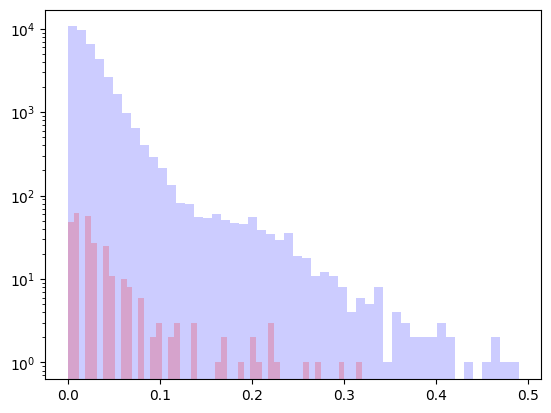

In [104]:
_=plt.hist(y_pred[y_test==0], color="b", alpha=0.2, bins=50, log=True)
_=plt.hist(y_pred[y_test==1], color="r", alpha=0.2, bins=50, log=True)

In [105]:
threshold = 0.5

In [106]:
print(classification_report(y_test, np.where(y_pred>=threshold, 1, 0)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     38894
           1       0.00      0.00      0.00       282

    accuracy                           0.99     39176
   macro avg       0.50      0.50      0.50     39176
weighted avg       0.99      0.99      0.99     39176



/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined

In [107]:
print(f"PR-AUC: {average_precision_score(y_test, y_pred)}")

PR-AUC: 0.011391802672125296


##### LightGBM

In [108]:
clf = LGBMClassifier(random_state=42)

In [109]:
clf.fit(x, y)

[LightGBM] [Info] Number of positive: 628, number of negative: 199796
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48526
[LightGBM] [Info] Number of data points in the train set: 200424, number of used features: 191
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003133 -> initscore=-5.762512
[LightGBM] [Info] Start training from score -5.762512


LGBMClassifier(random_state=42)

In [110]:
y_pred = clf.predict_proba(x_test)[:,1]

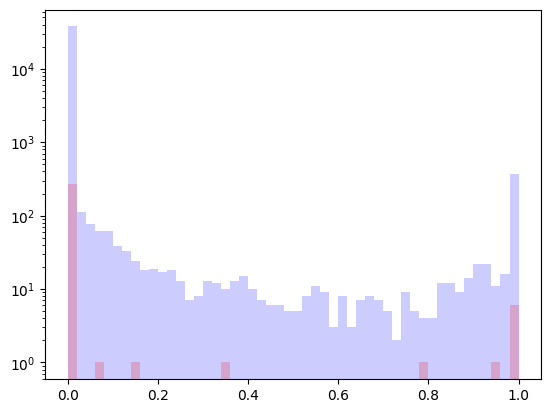

In [111]:
_=plt.hist(y_pred[y_test==0], color="b", alpha=0.2, bins=50, log=True)
_=plt.hist(y_pred[y_test==1], color="r", alpha=0.2, bins=50, log=True)

In [112]:
threshold = 0.5

In [113]:
print(classification_report(y_test, np.where(y_pred>=threshold, 1, 0)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     38894
           1       0.01      0.03      0.02       282

    accuracy                           0.98     39176
   macro avg       0.50      0.51      0.50     39176
weighted avg       0.99      0.98      0.98     39176



In [114]:
print(f"PR-AUC: {average_precision_score(y_test, y_pred)}")

PR-AUC: 0.00921118018058242


##### Multi Layer Perceptron

In [141]:
model = Sequential()

model.add(Input(shape=(x.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

In [142]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 128)            │        24,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,217 (161.00 KB)

 Trainable params: 41,217 (161.00 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
model.fit(
        x,
        y,
        epochs=10,
        batch_size=128,
        validation_split=0.2,
        verbose=1
)

Epoch 1/10
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - auc_19: 0.6160 - loss: 0.0494 - val_auc_19: 0.5396 - val_loss: 0.0438
Epoch 2/10
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - auc_19: 0.7033 - loss: 0.0365 - val_auc_19: 0.5330 - val_loss: 0.0448
Epoch 3/10
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - auc_19: 0.7253 - loss: 0.0355 - val_auc_19: 0.5412 - val_loss: 0.0439
Epoch 4/10
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - auc_19: 0.7632 - loss: 0.0353 - val_auc_19: 0.5411 - val_loss: 0.0449
Epoch 5/10
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - auc_19: 0.7792 - loss: 0.0341 - val_auc_19: 0.5267 - val_loss: 0.0466
Epoch 6/10
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - auc_19: 0.8097 - loss: 0.0328 - val_auc_19: 0.5122 - val_loss: 0.0491
Epoch 7/10
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - auc_19: 0.8290 - loss: 0.0315 - val_auc_19: 0.5181 - val_loss: 0.0507
Epoch 8/10
4260/4260 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - auc_19: 0.8567 - loss: 0.0302 - val_auc_19: 0.5234 - val_loss:

In [144]:
y_pred = model.predict(x_test)

1658/1658 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step


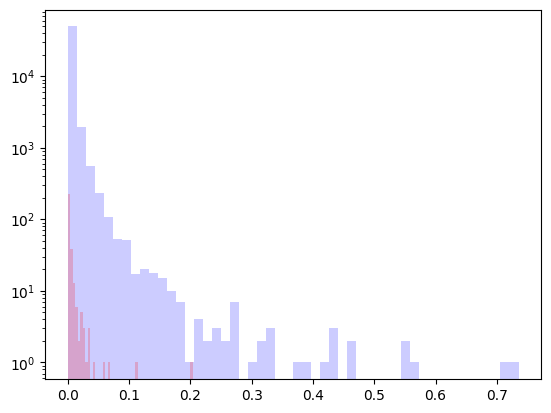

In [145]:
_=plt.hist(y_pred[y_test==0], color="b", alpha=0.2, bins=50, log=True)
_=plt.hist(y_pred[y_test==1], color="r", alpha=0.2, bins=50, log=True)

In [146]:
threshold = 0.5

In [147]:
print(classification_report(y_test, np.where(y_pred>=threshold, 1, 0)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     52742
           1       0.00      0.00      0.00       303

    accuracy                           0.99     53045
   macro avg       0.50      0.50      0.50     53045
weighted avg       0.99      0.99      0.99     53045



In [148]:
print(f"PR-AUC: {average_precision_score(y_test, y_pred)}")

PR-AUC: 0.0061074181896508175


- MLP with fine tunning

In [130]:
used_indices = set()
previous_model = None
metrics = pd.DataFrame(columns=["key", "precision", "recall", "f1", "pr-auc"])
threshold = 0.5

# Ensure keys are processed in order
for idx, key in enumerate(sorted(xy_train.keys())):
    print("="*120)
    print()
    print(f"Training for key {key}...")
    print()
    df = xy_train[key]
    df_test = xy_test[key]

    # Separate features and target
    x = df.drop(columns=['y'])
    y = df['y']
    x_test = df_test.drop(columns=['y'])
    y_test = df_test['y']

    # Get new indices not used in previous training
    new_indices = df.index.difference(used_indices)
    used_indices.update(df.index)

    x_new = x.loc[new_indices]
    y_new = y.loc[new_indices]

    # EarlyStopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    if previous_model is None:
        # Define a new model
        model.add(Input(shape=(x.shape[1],)))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
    else:
        model = previous_model

    # Train the model with early stopping
    model.fit(
        x_new,
        y_new,
        epochs=10,
        batch_size=128,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )
    # evaluate and save metrics
    y_pred = model.predict(x_test)
    metrics.loc[idx, :] = [key, 
                           precision_score(y_test, np.where(y_pred>=threshold, 1, 0)), 
                           recall_score(y_test, np.where(y_pred>=threshold, 1, 0)), 
                           f1_score(y_test, np.where(y_pred>=threshold, 1, 0)),
                           average_precision_score(y_test, y_pred)]



Training for key 2009_2014...



/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - auc_8: 0.5406 - loss: 0.0497 - val_auc_8: 0.4981 - val_loss: 0.0278
Epoch 2/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc_8: 0.7038 - loss: 0.0185 - val_auc_8: 0.5258 - val_loss: 0.0279
Epoch 3/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc_8: 0.7535 - loss: 0.0175 - val_auc_8: 0.5280 - val_loss: 0.0288
Epoch 4/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc_8: 0.7863 - loss: 0.0168 - val_auc_8: 0.6006 - val_loss: 0.0276
Epoch 5/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc_8: 0.8150 - loss: 0.0157 - val_auc_8: 0.5404 - val_loss: 0.0308
Epoch 6/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc_8: 0.8554 - loss: 0.0149 - val_auc_8: 0.5137 - val_loss: 0.0347
Epoch 7/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc_8: 0.8686 - loss: 0.0124 - val_auc_8: 0.5088 - val_loss: 0.0340
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training for key 2009_2015...



/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_9: 0.5255 - loss: 0.1439 - val_auc_9: 0.5444 - val_loss: 0.0434
Epoch 2/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_9: 0.7263 - loss: 0.0394 - val_auc_9: 0.5512 - val_loss: 0.0445
Epoch 3/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_9: 0.8084 - loss: 0.0357 - val_auc_9: 0.6047 - val_loss: 0.0444
Epoch 4/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_9: 0.8363 - loss: 0.0363 - val_auc_9: 0.5921 - val_loss: 0.0444
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training for key 2009_2016...

Epoch 1/10


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_10: 0.5168 - loss: 0.1428 - val_auc_10: 0.4733 - val_loss: 0.0333
Epoch 2/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_10: 0.7340 - loss: 0.0601 - val_auc_10: 0.4865 - val_loss: 0.0342
Epoch 3/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_10: 0.7946 - loss: 0.0597 - val_auc_10: 0.5057 - val_loss: 0.0343
Epoch 4/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_10: 0.8346 - loss: 0.0500 - val_auc_10: 0.5181 - val_loss: 0.0334
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training for key 2009_2017...

Epoch 1/10


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc_11: 0.4640 - loss: 0.1096 - val_auc_11: 0.5761 - val_loss: 0.0223
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_11: 0.6740 - loss: 0.0264 - val_auc_11: 0.5845 - val_loss: 0.0219
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_11: 0.7806 - loss: 0.0263 - val_auc_11: 0.5643 - val_loss: 0.0220
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_11: 0.7542 - loss: 0.0244 - val_auc_11: 0.5593 - val_loss: 0.0222
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_11: 0.8514 - loss: 0.0221 - val_auc_11: 0.5634 - val_loss: 0.0227
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training for key 2009_2018...

Epoch 1/10


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_12: 0.5077 - loss: 0.1049 - val_auc_12: 0.5325 - val_loss: 0.0495
Epoch 2/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_12: 0.6607 - loss: 0.0292 - val_auc_12: 0.5765 - val_loss: 0.0490
Epoch 3/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_12: 0.7623 - loss: 0.0284 - val_auc_12: 0.5403 - val_loss: 0.0491
Epoch 4/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_12: 0.8166 - loss: 0.0250 - val_auc_12: 0.5640 - val_loss: 0.0514
Epoch 5/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_12: 0.8508 - loss: 0.0230 - val_auc_12: 0.5660 - val_loss: 0.0513
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training for key 2009_2019...

Epoch 1/10


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc_13: 0.5085 - loss: 0.1124 - val_auc_13: 0.5192 - val_loss: 0.0516
Epoch 2/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_13: 0.6751 - loss: 0.0288 - val_auc_13: 0.5381 - val_loss: 0.0543
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_13: 0.8214 - loss: 0.0242 - val_auc_13: 0.5022 - val_loss: 0.0581
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_13: 0.8244 - loss: 0.0261 - val_auc_13: 0.4976 - val_loss: 0.0605
1736/1736 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training for key 2009_2020...

Epoch 1/10


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_14: 0.6138 - loss: 0.1427 - val_auc_14: 0.5656 - val_loss: 0.0514
Epoch 2/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_14: 0.7820 - loss: 0.0874 - val_auc_14: 0.5995 - val_loss: 0.0515
Epoch 3/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_14: 0.8385 - loss: 0.0811 - val_auc_14: 0.5820 - val_loss: 0.0525
Epoch 4/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc_14: 0.8457 - loss: 0.0783 - val_auc_14: 0.6032 - val_loss: 0.0532
2141/2141 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training for key 2009_2021...

Epoch 1/10


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - auc_15: 0.5628 - loss: 0.1029 - val_auc_15: 0.5472 - val_loss: 0.0467
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc_15: 0.7422 - loss: 0.0414 - val_auc_15: 0.5581 - val_loss: 0.0460
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc_15: 0.7681 - loss: 0.0427 - val_auc_15: 0.5485 - val_loss: 0.0496
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc_15: 0.7893 - loss: 0.0354 - val_auc_15: 0.5341 - val_loss: 0.0483
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc_15: 0.8519 - loss: 0.0351 - val_auc_15: 0.5568 - val_loss: 0.0491
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 2s 658us/step


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training for key 2009_2022...

Epoch 1/10


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc_16: 0.5513 - loss: 0.0728 - val_auc_16: 0.5203 - val_loss: 0.0388
Epoch 2/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc_16: 0.7186 - loss: 0.0362 - val_auc_16: 0.5396 - val_loss: 0.0383
Epoch 3/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc_16: 0.7717 - loss: 0.0354 - val_auc_16: 0.5136 - val_loss: 0.0403
Epoch 4/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc_16: 0.7902 - loss: 0.0342 - val_auc_16: 0.4921 - val_loss: 0.0404
Epoch 5/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc_16: 0.8382 - loss: 0.0336 - val_auc_16: 0.4956 - val_loss: 0.0443
2230/2230 ━━━━━━━━━━━━━━━━━━━━ 2s 665us/step


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training for key 2009_2023...



/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - auc_17: 0.5352 - loss: 0.0915 - val_auc_17: 0.5514 - val_loss: 0.0382
Epoch 2/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc_17: 0.7232 - loss: 0.0428 - val_auc_17: 0.5885 - val_loss: 0.0392
Epoch 3/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_17: 0.7816 - loss: 0.0394 - val_auc_17: 0.5515 - val_loss: 0.0380
Epoch 4/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc_17: 0.8225 - loss: 0.0384 - val_auc_17: 0.5468 - val_loss: 0.0389
Epoch 5/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc_17: 0.8505 - loss: 0.0358 - val_auc_17: 0.5590 - val_loss: 0.0407
Epoch 6/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc_17: 0.8973 - loss: 0.0335 - val_auc_17: 0.5594 - val_loss: 0.0422
1658/1658 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


/Users/lucasdeangelisoliveira/Documents/master/1o semestre/prob e estat/env_short_squeeze/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [131]:
metrics

,key,precision,recall,f1,pr-auc
0,2009_2014,0.0,0.0,0.0,0.008365
1,2009_2015,0.0,0.0,0.0,0.011732
2,2009_2016,0.0,0.0,0.0,0.004798
3,2009_2017,0.0,0.0,0.0,0.0055
4,2009_2018,0.0,0.0,0.0,0.005665
5,2009_2019,0.0,0.0,0.0,0.01876
6,2009_2020,0.0,0.0,0.0,0.008073
7,2009_2021,0.0,0.0,0.0,0.007598
8,2009_2022,0.0,0.0,0.0,0.009181
9,2009_2023,0.0,0.0,0.0,0.007463
